In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [33]:
info_race = pd.read_csv("ischool_race.csv")
info_race["School"] = "Inforamtion Science"
info_race[info_race["Year"] == 2024]["Count"].sum()

np.int64(2116)

In [34]:
cmns_race = pd.read_csv("cmns_race.csv")
cmns_race["School"] = "Computer Science"
cmns_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,7,Computer Science
1,2016,Asian,Asian,1610,Computer Science
2,2016,Black or African American,Black or African American,589,Computer Science
3,2016,Hispanic/Latino,Hispanic/Latino,417,Computer Science
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,4,Computer Science
...,...,...,...,...,...
76,2024,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,4,Computer Science
77,2024,Two or More Races,Two or More Races,330,Computer Science
78,2024,U.S. Nonresident,U.S. Nonresident,392,Computer Science
79,2024,Unknown,Unknown,487,Computer Science


In [35]:
bmgt_race = pd.read_csv("bmgt_race.csv")
bmgt_race["School"] = "Business"
bmgt_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,1,Business
1,2016,Asian,Asian,546,Business
2,2016,Black or African American,Black or African American,265,Business
3,2016,Hispanic/Latino,Hispanic/Latino,334,Business
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,3,Business
...,...,...,...,...,...
76,2024,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,1,Business
77,2024,Two or More Races,Two or More Races,140,Business
78,2024,U.S. Nonresident,U.S. Nonresident,92,Business
79,2024,Unknown,Unknown,150,Business


In [36]:
jour_race = pd.read_csv("jour_race.csv")
jour_race["School"] = "Journalism"
jour_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,1,Journalism
1,2016,Asian,Asian,26,Journalism
2,2016,Black or African American,Black or African American,66,Journalism
3,2016,Hispanic/Latino,Hispanic/Latino,39,Journalism
4,2016,Two or More Races,Two or More Races,15,Journalism
...,...,...,...,...,...
67,2024,Hispanic/Latino,Hispanic/Latino,41,Journalism
68,2024,Two or More Races,Two or More Races,17,Journalism
69,2024,U.S. Nonresident,U.S. Nonresident,4,Journalism
70,2024,Unknown,Unknown,15,Journalism


In [37]:
computing_majors_racial_makeup = pd.concat([info_race,cmns_race,bmgt_race,jour_race])
computing_majors_racial_makeup

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,1,Inforamtion Science
1,2016,Asian,Asian,21,Inforamtion Science
2,2016,Black or African American,Black or African American,31,Inforamtion Science
3,2016,Hispanic/Latino,Hispanic/Latino,9,Inforamtion Science
4,2016,Native Hawaiian or Other Pacific Islander,Not Reported,0,Inforamtion Science
...,...,...,...,...,...
67,2024,Hispanic/Latino,Hispanic/Latino,41,Journalism
68,2024,Two or More Races,Two or More Races,17,Journalism
69,2024,U.S. Nonresident,U.S. Nonresident,4,Journalism
70,2024,Unknown,Unknown,15,Journalism


In [55]:
racial_makeup_count = computing_majors_racial_makeup.groupby(["Year","Race/Ethnicity (Current)"]).sum()["Count"]
racial_makeup_count

Year  Race/Ethnicity (Current)                 
2016  American Indian or Alaska Native               10
      Asian                                        2203
      Black or African American                     951
      Hispanic/Latino                               799
      Native Hawaiian or Other Pacific Islander       7
                                                   ... 
2024  Not Reported                                    1
      Two or More Races                             574
      U.S. Nonresident                              557
      Unknown                                       727
      White                                        4087
Name: Count, Length: 90, dtype: int64

In [39]:
total_population_computing = racial_makeup_count.sum()
total_population_computing

np.int64(99035)

In [40]:
racial_makeup = (racial_makeup_count/total_population_computing)*100
racial_makeup

Race/Ethnicity (Current)
American Indian or Alaska Native              0.083809
Asian                                        28.220326
Black or African American                    10.657848
Hispanic/Latino                               8.151664
Native Hawaiian or Other Pacific Islander     0.045438
Not Reported                                  0.001010
Two or More Races                             4.061190
U.S. Nonresident                              5.029535
Unknown                                       3.932953
White                                        39.816227
Name: Count, dtype: float64

In [52]:
racial_makeup_count_by_school = computing_majors_racial_makeup.groupby(["Year","School","Race/Ethnicity (Current)"]).sum()["Count"]
racial_makeup_count_by_school.to_csv("racial_makeup_count_by_school.csv")

In [54]:
total_population_computing_by_school = racial_makeup_count_by_school.groupby(["Year","School"]).sum()
total_population_computing_by_school

Year  School             
2016  Business               2923
      Computer Science       5784
      Inforamtion Science      94
      Journalism              477
2017  Business               2894
      Computer Science       6219
      Inforamtion Science     376
      Journalism              459
2018  Business               2939
      Computer Science       6582
      Inforamtion Science     718
      Journalism              464
2019  Business               2901
      Computer Science       6506
      Inforamtion Science     971
      Journalism              469
2020  Business               2900
      Computer Science       6525
      Inforamtion Science    1171
      Journalism              443
2021  Business               3004
      Computer Science       6381
      Inforamtion Science    1224
      Journalism              446
2022  Business               3044
      Computer Science       6321
      Inforamtion Science    1436
      Journalism              426
2023  Business        

In [43]:
racial_makeup_by_school = (racial_makeup_count_by_school/total_population_computing_by_school)*100
racial_makeup_by_school

School               Race/Ethnicity (Current)                 
Business             American Indian or Alaska Native              0.060033
                     Asian                                        19.510731
                     Black or African American                     8.460903
                     Hispanic/Latino                              10.858472
                     Native Hawaiian or Other Pacific Islander     0.063785
                     Two or More Races                             3.511932
                     U.S. Nonresident                              3.920906
                     Unknown                                       3.324328
                     White                                        50.288909
Computer Science     American Indian or Alaska Native              0.065022
                     Asian                                        33.217549
                     Black or African American                     9.354574
                     Hisp

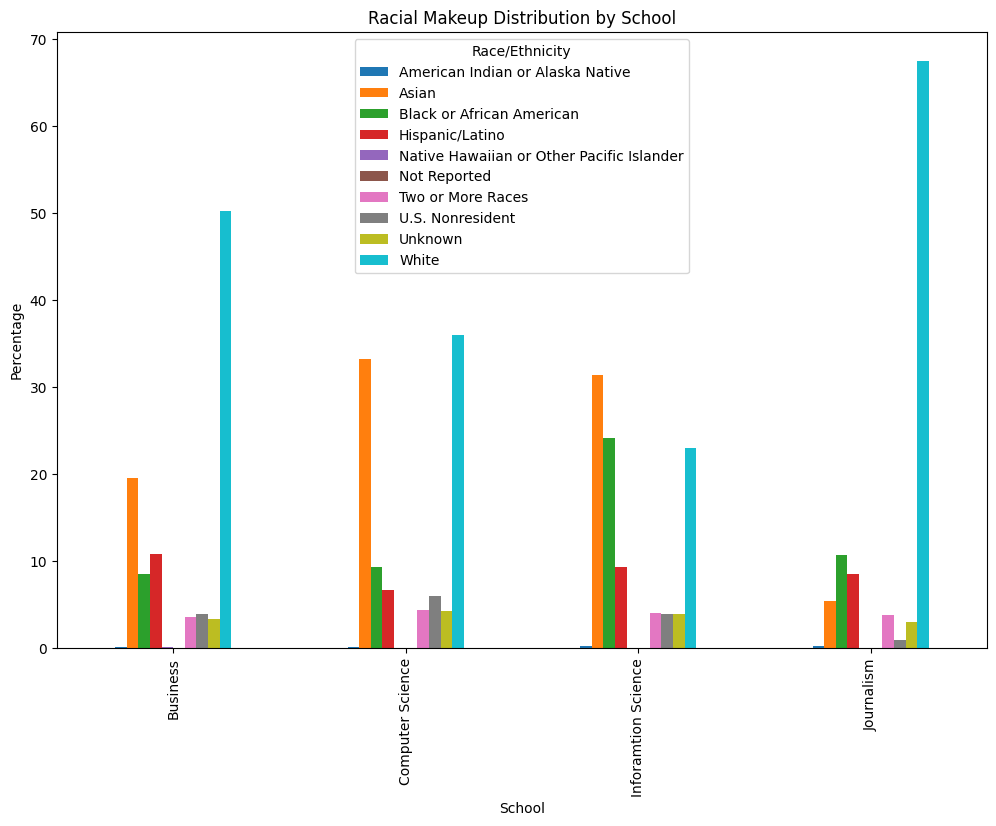

In [44]:
racial_makeup_by_school_df = racial_makeup_by_school.unstack(level=0)

racial_makeup_by_school_df = racial_makeup_by_school_df.T

ax = racial_makeup_by_school_df.plot(kind='bar', figsize=(12, 8))

plt.title('Racial Makeup Distribution by School')
plt.xlabel('School')
plt.ylabel('Percentage')
plt.legend(title='Race/Ethnicity')
plt.show()

In [50]:
def shannon_index(count,total):
    proportions = count / total
    shannon_score = -sum([p * math.log(p,2) for p in proportions if p > 0])
    return shannon_score

computing_majors_racial_makeup_2024 = computing_majors_racial_makeup[computing_majors_racial_makeup["Year"] == 2024]
counts_sum = computing_majors_racial_makeup_2024.groupby("School").sum()["Count"]
shannon_index_by_school = computing_majors_racial_makeup_2024.groupby("School").apply(
    lambda x: shannon_index(x["Count"], counts_sum[x.name])
)

shannon_index_by_school

/var/folders/f2/khxmvr8d6_n835pmcskbw1km0000gn/T/ipykernel_2698/2693217071.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shannon_index_by_school = computing_majors_racial_makeup_2024.groupby("School").apply(


School
Business               2.231054
Computer Science       2.282032
Inforamtion Science    2.365431
Journalism             1.808633
dtype: float64

/var/folders/f2/khxmvr8d6_n835pmcskbw1km0000gn/T/ipykernel_2698/586758269.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shannon_index_over_time = computing_majors_racial_makeup.groupby(["Year", "School"]).apply(


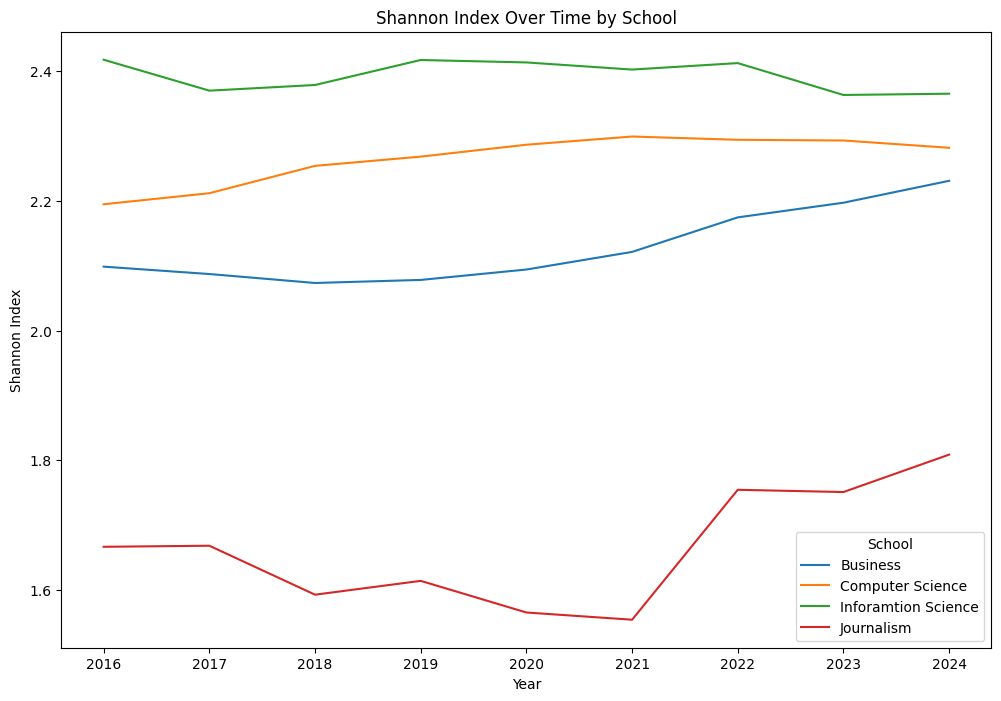

In [47]:
shannon_index_over_time = computing_majors_racial_makeup.groupby(["Year", "School"]).apply(
    lambda x: shannon_index(x["Count"], x["Count"].sum())
).unstack(level=0)

shannon_index_over_time = shannon_index_over_time.T


shannon_index_over_time.plot(kind="line",figsize=(12, 8))
plt.title('Shannon Index Over Time by School')
plt.xlabel('Year')
plt.ylabel('Shannon Index')
plt.legend(title='School')
plt.show()